<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage">
</a>


<h1>Classifying European Money Denominations</h1>


<h2>Table of Contents</h2>


<p>In this lab, you will learn how to load image folder in Keras. Test the images by the libraries in the matplotlib.</p>
<ul>
    <li><a href="#load_image">Load Image</a></li>
    <li><a href="#ques">Questions</a>
        <ol>
            <li><a href="#q21">Question 2.1</a></li>
            <li><a href="#q22">Question 2.2</a></li>
        </ol>
    </li>

</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<h2>Preparation</h2>


<a href="https://cocl.us/DL0320EN_storage">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/ObjectStorage.png" width="750" alt="cognitive class">
</a>


Download the datasets you needed for this lab.


In [1]:
# You can comment the code in this box out if you already have the dataset.
# Step 1: Ctrl + A : Select all
# Step 2: Ctrl + / : Comment out all; if everything selected has been comment out alreaday, then uncomment all

# Download Training Dataset
!wget --quiet -O /resources/data/train_data_keras.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_KERAS
!tar -xzf /resources/data/train_data_keras.tar.gz -C /resources/data --exclude '.*'

# Download Validation Dataset
!wget --quiet -O /resources/data/validation_data_keras.tar.gz https://cocl.us/DL0320EN_VALID_TAR_KERAS
!tar -xzf /resources/data/validation_data_keras.tar.gz -C /resources/data --exclude '.*'

The following are the Keras modules you are going to need


In [2]:
# Import Keras Modules

import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Import Non-Keras Modules 


In [3]:
# Import Non-Keras Modules

import os
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image
import numpy as np 

Set the parameters


In [4]:
# Parameters for the image dataset generators

TARGET_SIZE = (224, 224)
BATCH_SIZE = 5
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
RANDOM_SEED = 0

<hr>


<h2 id="load_image">Load Image</h2>


<h3>Training Images</h3>


The train images are stored in the following directory 
<code>/resources/data/train_data_keras/</code>. We can save it in the variable <code>train_data_dir</code>.


In [5]:
# Get the train dataset folder and store it in train_data_dir

train_data_dir = '/resources/data/train_data_keras'

To load the image, you need the directory that contains the entire dataset. Then you can use the <code>ImageDataGenerator()</code> with <code>flow_from_directory()</code> to get the images from folder and load them into a data object.<br>
In function <code>flow_from_directory()</code>, you can set the directory path that contains the entire dataset.<br>
You can set the target size of images, set the batch size, set the classes which are the labels in the dataset and the random seed.<br>
The labels are the sub-folder names like <i>5</i>, <i>10</i>, <i>20</i> ... In our dataset, there are 7 different labels. (5, 10, 20, 50, 100, 200, 500)


In [6]:
# Generate training image dataset

train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED)

Found 70 images belonging to 7 classes.


<h3>Validation Images</h3>


The validation data is stored in the following directory <code>/resources/data/validation_data_keras</code>. We can assign it to the variable   <code>validation_data_dir</code>.


In [7]:
# Get the validation dataset folder and store it in validation_data_dir

validation_data_dir = '/resources/data/validation_data_keras'

<h3>Try</h3>


Use the same procedure as above to load and plot the first validation image in the validation set <b>(Please use the parameter defined in preparation section when you are trying to get the answer for the questions in the next section)</b>:


In [8]:
# A practice that won't be graded, but you need it to complete the following questions

# Type your code here
valid_generater = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size = TARGET_SIZE
                                                           , batch_size = BATCH_SIZE
                                                           , classes= CLASSES
                                                           , seed = RANDOM_SEED)

Found 70 images belonging to 7 classes.


Double-click <b>here</b> for the solution.
<!--
valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED)
-->


<hr>


<h2 id="ques">Questions</h2>


In this section, you will test your dataset object. Please plot out the images in the first batch.


If you generate the dataset correctly, there are 5 European Bills are going to be plot out.


<i>Hint: <br>
<ol>
    <li>Use <code>image_generator.batch_size</code> to get the batch size.</li>
    <li>Create a loop to get each image</li>
    <li>Use <code>image_generator.next()[0]</code> to get the first batch</li>
    <li>Convert the image array to <code>np.uint8</code> by <code>obj.astype(np.uint8)</code> before you plot them</li>
    <li>Use the <code>plt.imshow(image)</code> and <code>plt.show()</code> to plot the image</li>
</ol>
</i>


<h3 id="q21">Question 2.1</h3>


Test the training dataset.


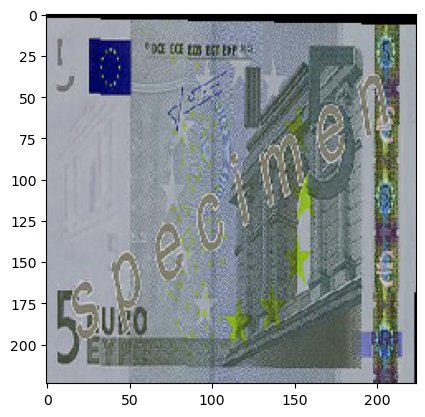

In [12]:
# Question 2.1

# Type your code here
batch_size = train_generator.batch_size

for item in range(batch_size):
    image = train_generator.next()[0][item].astype(np.uint8)
    plt.imshow(image)
    plt.show

<h3 id="q22">Question 2.2</h3>


Test the validation dataset.


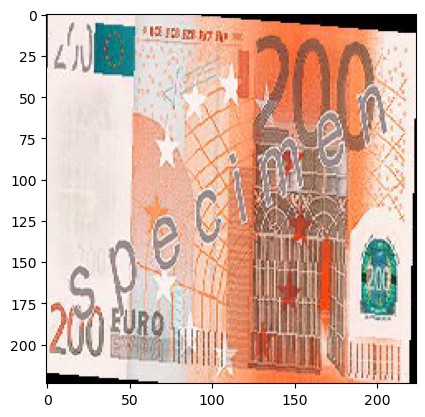

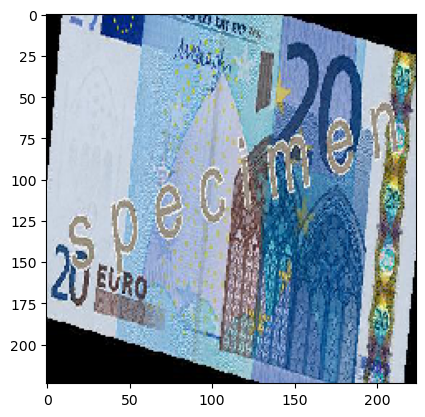

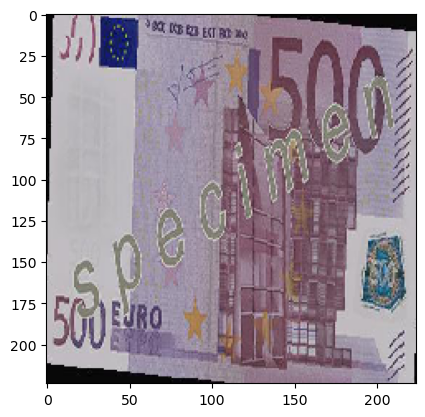

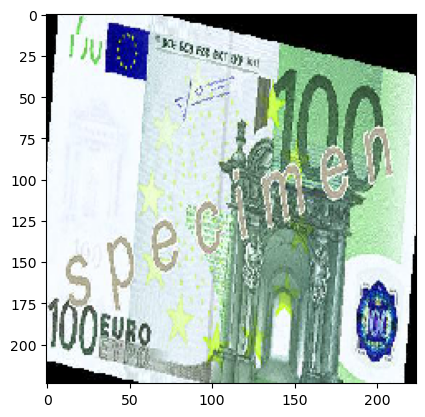

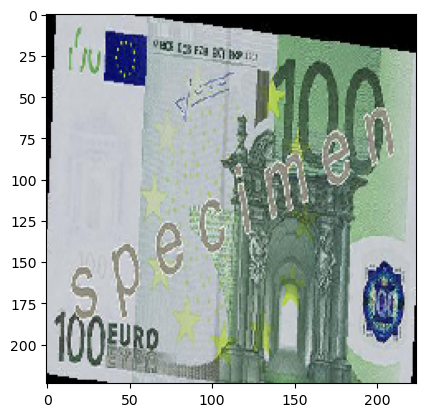

In [18]:
# Question 2.2

# Type your code here
for item in range(valid_generater.batch_size):
    plt.imshow(valid_generater.next()[0][item].astype(np.uint8))
    plt.show()

<a href="https://cocl.us/DLO0320EN_notebook_bott">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Bottom.png" width="750" alt="cognitive class">
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Yi Leng Yao</a>


<hr>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">MIT License</a>.
